# Clustering de series IASS por CCAA
## Análisis por periodos

A continuación presentamos un caso de uso para los datos del Indicador de Actividad del Sector Servicios (IASS) desde 2005 hasta 2022. Se trata de hacer un análisis cluster de series temporales por comunidades autónomas en varios periodos para ver la evolución de los conglomerados en el tiempo.

El clustering de series temporales está basado fundamentalmente en la definición de distancias entre series. Una vez definidas estas distancias, sólo hay que aplicar el algoritmos de análisis de conglomerados más conveniente. En este caso usaremos el análisis de conglomerados jerárquico y probaremos con dos distancias. Ambas distancias están basadas en modelos de regresión.





## Importación de módulos

In [ ]:
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 11.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Lectura y preparación de datos

Leemos la base de datos de las estadísticas IASS.

Para hacer un estudio más exhaustivo, vamos a dividir los datos en cuatro periodos:

Periodo 1: Enero 2005 a julio 2008 (antes de la crisis económica de la burbuja inmobiliaria).

Periodo 2: Agosto 2008 a febrero 2013 (la crisis económica).

Periodo 3: Marzo 2013 a febrero 2020 (el período de recuperación de esta crisis hasta que se decretó el estado de alarma por la pandemia).

Periodo 4: Marzo 2020 a agosto 2022 (periodo de estado de alarma hasta agosto de 2022).

Para que en cada periodo inicialicemos al mismo nivel, dividiremos los datos de cada comunidad autónoma por la primera observación del periodo correspondiente. Así los resultados serán comparables porque todos representarán la variación respecto de la primera observación. En la base de datos ya están calculadas estas variaciones.

In [ ]:
# Vamos a definir una función que transforme una cadena de formato "%YM%m", en una fecha
def f(string):
  d = datetime.datetime.strptime(string,"%YM%m").date()
  return(d)

In [ ]:
file = 'IASS_database.xlsx'
periodos = pd.read_excel(io = file,sheet_name = 'Datos',header = 0,usecols="B") 

# Definimos el conjunto de filas que hay que desechar en cada periodo
skipP1 = [i+1 for i in periodos.loc[periodos.iloc[:,0] != 1].index]
skipP2 = [i+1 for i in periodos.loc[periodos.iloc[:,0] != 2].index]
skipP3 = [i+1 for i in periodos.loc[periodos.iloc[:,0] != 3].index]
skipP4 = [i+1 for i in periodos.loc[periodos.iloc[:,0] != 4].index]

# Leemos los datos de cada periodo
datos_P1 = pd.read_excel(io = file,sheet_name = 'Datos',header = 0,usecols="A,T:AJ", parse_dates=["Fecha"], date_parser=f,skiprows=[i for i in skipP1])
datos_P2 = pd.read_excel(io = file,sheet_name = 'Datos',header = 0,usecols="A,T:AJ", parse_dates=["Fecha"], date_parser=f,skiprows=[i for i in skipP2])  
datos_P3 = pd.read_excel(io = file,sheet_name = 'Datos',header = 0,usecols="A,T:AJ", parse_dates=["Fecha"], date_parser=f,skiprows=[i for i in skipP3])  
datos_P4 = pd.read_excel(io = file,sheet_name = 'Datos',header = 0,usecols="A,T:AJ", parse_dates=["Fecha"], date_parser=f,skiprows=[i for i in skipP4])  

# Usamos la columna de fechas como nombre de las filas 
datos_P1.rename(index=datos_P1["Fecha"],inplace=True)
datos_P1 = datos_P1.drop(['Fecha'], axis=1)
datos_P2.rename(index=datos_P2["Fecha"],inplace=True)
datos_P2 = datos_P2.drop(['Fecha'], axis=1)
datos_P3.rename(index=datos_P3["Fecha"],inplace=True)
datos_P3 = datos_P3.drop(['Fecha'], axis=1)
datos_P4.rename(index=datos_P4["Fecha"],inplace=True)
datos_P4 = datos_P4.drop(['Fecha'], axis=1)

In [ ]:
# Definimos el conjunto de las Comunidades Autónomas, que están guardadas en la base de datos
CCAA = pd.read_excel(io = file,sheet_name = 'Metadatos',header = 0,usecols="B")
CCAA = CCAA[2:19] # eliminamos las repeticiones y los valores no observados
CCAA = [ccaa[0] for ccaa in CCAA.to_numpy()] # lo guardamos como lista
CCAA

['Andalucía',
 'Aragón',
 'Asturias',
 'Islas Baleares',
 'Canarias',
 'Cantabria',
 'Castilla León',
 'Castilla la Mancha',
 'Cataluña',
 'Comunitat Valenciana',
 'Extremadura',
 'Galicia',
 'Madrid',
 'Murcia',
 'Navarra',
 'País Vasco',
 'La Rioja']

## Representación gráfica de las series variacionales por periodo

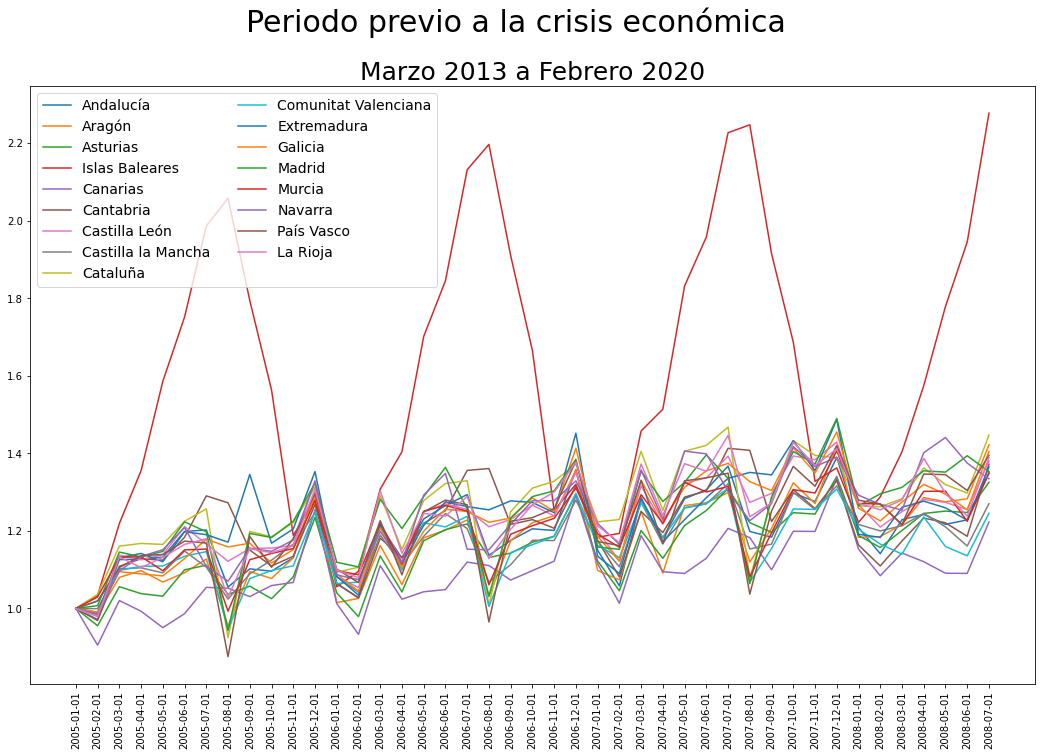

In [ ]:
plt.figure(figsize=(18,11))
x = range(0,datos_P1.shape[0])
labels = [d.date() for d in datos_P1.index]
plt.plot(x,datos_P1)
plt.legend(CCAA,fontsize = 14,ncol = 2)
plt.xticks(x, labels, rotation='vertical')
plt.title("Marzo 2013 a Febrero 2020",fontsize=25)
plt.suptitle("Periodo previo a la crisis económica",fontsize=30)
plt.show()

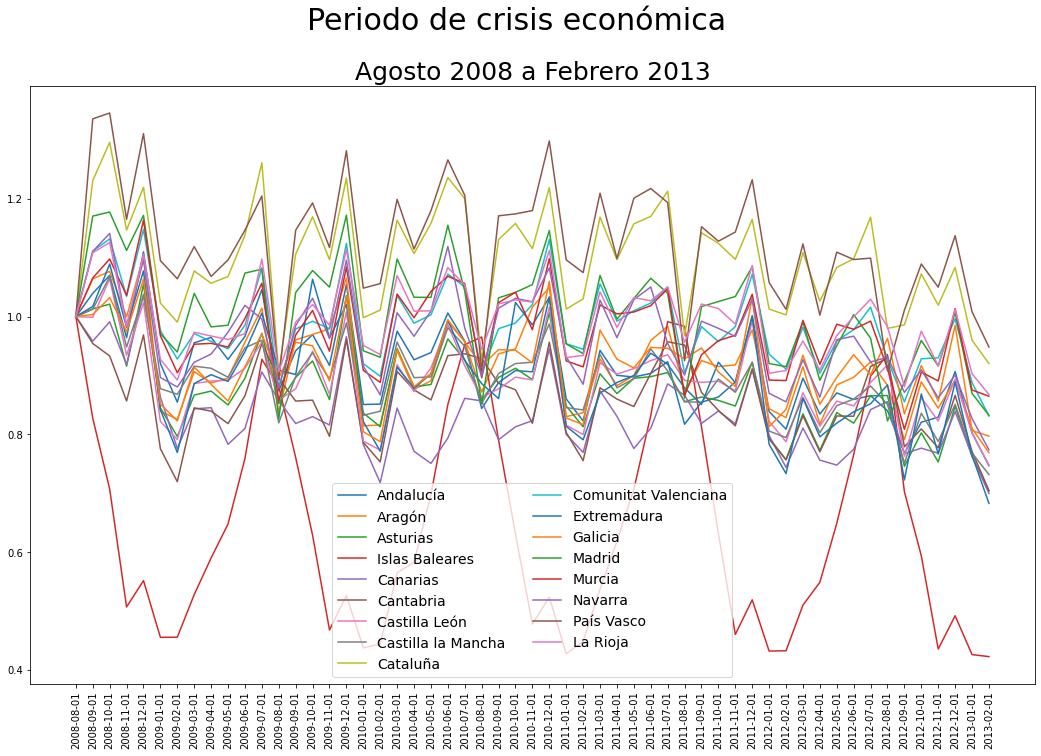

In [ ]:
plt.figure(figsize=(18,11))
x = range(0,datos_P2.shape[0])
labels = [d.date() for d in datos_P2.index]
plt.plot(x,datos_P2)
plt.legend(CCAA,fontsize = 14,ncol = 2)
plt.xticks(x, labels, rotation='vertical')
plt.title("Agosto 2008 a Febrero 2013",fontsize=25)
plt.suptitle("Periodo de crisis económica",fontsize=30)
plt.show()

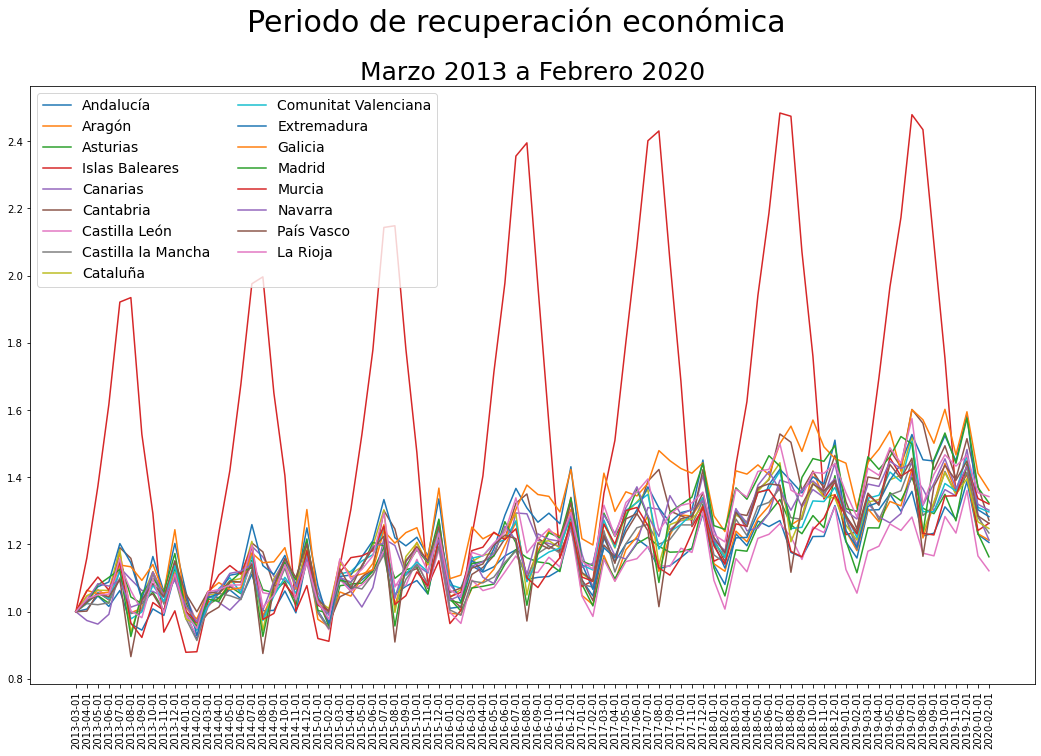

In [ ]:
plt.figure(figsize=(18,11))
x = range(0,datos_P3.shape[0])
labels = [d.date() for d in datos_P3.index]
plt.plot(x,datos_P3)
plt.legend(CCAA,fontsize = 14,ncol = 2)
plt.xticks(x, labels, rotation='vertical')
plt.title("Marzo 2013 a Febrero 2020",fontsize=25)
plt.suptitle("Periodo de recuperación económica",fontsize=30)
plt.show()

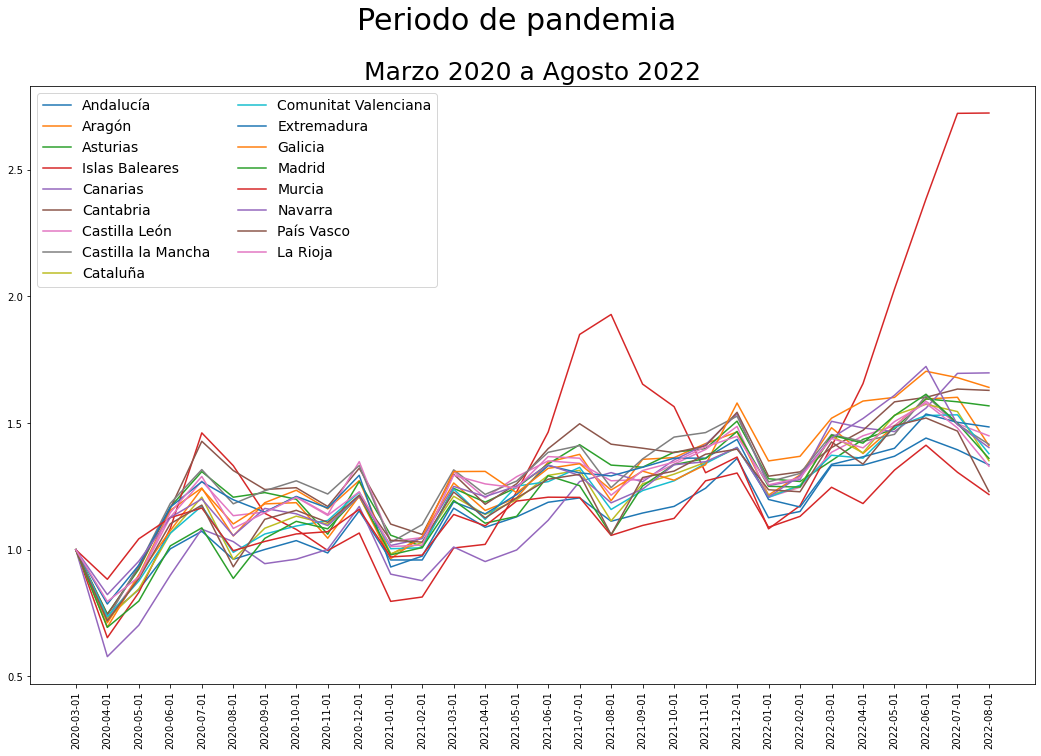

In [ ]:
plt.figure(figsize=(18,11))
x = range(0,datos_P4.shape[0])
labels = [d.date() for d in datos_P4.index]
plt.plot(x,datos_P4)
plt.legend(CCAA,fontsize = 14,ncol = 2)
plt.xticks(x, labels, rotation='vertical')
plt.title("Marzo 2020 a Agosto 2022",fontsize=25)
plt.suptitle("Periodo de pandemia",fontsize=30)
plt.show()


## Matriz de distancias

### Basada en los coeficientes de correlación

La idea para definir esta matriz de distancias entre series temporales es ajustar un modelo de regresión para cada una de ellas y comparar los coeficientes de los modelos. Las variables explicativas son: cada mes del año, y el tiempo. 

La variable explicativa correspondiente al $i$-ésimo mes es un vector dummyi definido:

dummyi$[a]$ = 1 si la observación $a$ es del $i$-ésimo mes y 0 en caso contrario.

La variable tiempo es $i$ para la $i$-ésima observación.

Si $M$ es la matriz de distancias, $M[i,j]$ es la distancia euclídea entre el vector de coeficientes del modelo ajustado sobre la serie $i$ y el vector de coeficientes del modelo ajustado sobre la serie $j$.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

In [ ]:
# Guardaremos medidas para visualizar la bondad de los modelos
MSE = []
R2 = []

# Guardaremos también los coeficientes de cada modelo
modelos = [] 

lm = LinearRegression(fit_intercept=True)
    
for datos_P in [datos_P1,datos_P2,datos_P3,datos_P4]:
  # Definimos las variables dummy, que representen el mes (11 variables dummy), y la variable tiempo.
  # Añadimos estas variables al dataset inicial
  datos_P["dummy1"] = [int(date.month == 1) for date in datos_P.index]
  datos_P["dummy2"] = [int(date.month == 2) for date in datos_P.index]
  datos_P["dummy3"] = [int(date.month == 3) for date in datos_P.index]
  datos_P["dummy4"] = [int(date.month == 4) for date in datos_P.index]
  datos_P["dummy5"] = [int(date.month == 5) for date in datos_P.index]
  datos_P["dummy6"] = [int(date.month == 6) for date in datos_P.index]
  datos_P["dummy7"] = [int(date.month == 7) for date in datos_P.index]
  datos_P["dummy8"] = [int(date.month == 8) for date in datos_P.index]
  datos_P["dummy9"] = [int(date.month == 9) for date in datos_P.index]
  datos_P["dummy10"] = [int(date.month == 10) for date in datos_P.index]
  datos_P["dummy11"] = [int(date.month == 11) for date in datos_P.index]
  datos_P["dummy12"] = [int(date.month == 12) for date in datos_P.index]
  datos_P["tiempo"] = [i for i in range(datos_P.shape[0])]

  # Regresión lineal
  for Y in datos_P.columns[range(len(CCAA))]:
    datos = datos_P[[Y,"dummy1","dummy2","dummy3","dummy4","dummy5","dummy6","dummy7","dummy8","dummy9","dummy10","dummy11","dummy12","tiempo"]]
    # Entrenamos
    reg = lm.fit(datos.drop(columns = [Y]), datos[Y])
    modelos.append(reg.coef_)
    # Predecimos en los datos
    predictions = reg.predict(datos.drop(columns = [Y]))
    # Calculamos métricas para comprobar la bondad del modelo
    MSE.append(np.sqrt(mean_squared_error(predictions, datos[Y])))
    R2.append(r2_score(predictions, datos[Y]))
  

Veamos el comportamiento de los modelos ajustados representando la evolución del error cuadrático medio para cada modelo y la evolución del $R^2$.

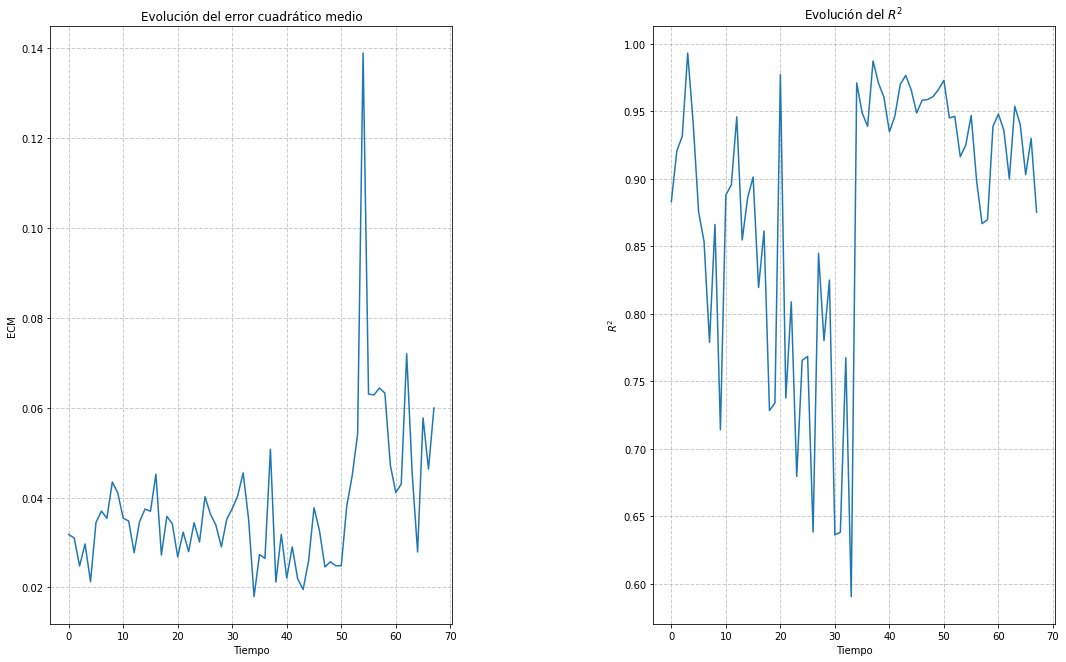

In [ ]:
fig1 = plt.figure(figsize=(18,11))
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig1.add_subplot(1,2,1)
ax.plot(MSE)
ax.set_title('Evolución del error cuadrático medio')
ax.set_xlabel('Tiempo')
ax.set_ylabel('ECM')
ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)

ax = fig1.add_subplot(1,2,2)
ax.plot(R2)
ax.set_title('Evolución del $R^2$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('$R^2$')
ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)

Ahora hemos de comparar los modelos construidos calculando, para cada periodo, las distancias euclídeas entre los vectores de coeficientes de los modelos que se han definido para cada comunidad autónoma.

In [ ]:
matdist_P1 = np.zeros([len(CCAA),len(CCAA)])
matdist_P2 = np.zeros([len(CCAA),len(CCAA)])
matdist_P3 = np.zeros([len(CCAA),len(CCAA)])
matdist_P4 = np.zeros([len(CCAA),len(CCAA)])

p = 0
for mat in [matdist_P1,matdist_P2,matdist_P3,matdist_P4]:
  for i in range(len(CCAA)):
    for j in range(i+1,len(CCAA)):
      mat[i,j] = np.linalg.norm(modelos[p+i]-modelos[p+j])
      mat[j,i] = mat[i,j]
  p += 12

### Basada en el error de predicción

La idea para definir esta matriz de distancias entre series temporales es ajustar un modelo de regresión múltiple para cada serie y predecir los valores todas las series con cada modelo. En este caso, las variables explicativas son: cada mes del año, y el tiempo. 

La variable explicativa correspondiente al $i$-ésimo mes es un vector dummyi definido:

dummyi$[a]$ = 1 si la observación $a$ es del $i$-ésimo mes y 0 en caso contrario.

La variable tiempo es $i$ para la $i$-ésima observación.

Si $M$ es la matriz de distancias, $M[i,j]$ es la raíz cuadrada del error cuadrático medio cometido tras predecir las observaciones de la serie $j$ mediante el modelo de regresión ajustado sobre los datos de la serie $i$.

Como esta definición no crea una matriz simétrica, construiremos $M_{sim}$ de la siguiente forma:

1. $M_{sim}[i,i] = 0,$  $\forall i$ 

2. $M_{sim}[i,j]$ = $M_{sim}[j,i]$ = max$\{M[i,j],M[j,i]\},$ $\forall i \neq j$

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

In [ ]:
# Contruimos matrices de ceros para rellenarlas
matdist_P1 = np.zeros([len(CCAA),len(CCAA)])
matdist_P2 = np.zeros([len(CCAA),len(CCAA)])
matdist_P3 = np.zeros([len(CCAA),len(CCAA)])
matdist_P4 = np.zeros([len(CCAA),len(CCAA)])

lm = LinearRegression(fit_intercept=True)
    
for datos_P,matdist_P in [[datos_P1,matdist_P1],[datos_P2,matdist_P2],[datos_P3,matdist_P3],[datos_P4,matdist_P4]]:
  # Definimos las variables dummy, que representen el mes (11 variables dummy), y la variable tiempo.
  # Añadimos estas variables al dataset inicial
  datos_P["dummy1"] = [int(date.month == 1) for date in datos_P.index]
  datos_P["dummy2"] = [int(date.month == 2) for date in datos_P.index]
  datos_P["dummy3"] = [int(date.month == 3) for date in datos_P.index]
  datos_P["dummy4"] = [int(date.month == 4) for date in datos_P.index]
  datos_P["dummy5"] = [int(date.month == 5) for date in datos_P.index]
  datos_P["dummy6"] = [int(date.month == 6) for date in datos_P.index]
  datos_P["dummy7"] = [int(date.month == 7) for date in datos_P.index]
  datos_P["dummy8"] = [int(date.month == 8) for date in datos_P.index]
  datos_P["dummy9"] = [int(date.month == 9) for date in datos_P.index]
  datos_P["dummy10"] = [int(date.month == 10) for date in datos_P.index]
  datos_P["dummy11"] = [int(date.month == 11) for date in datos_P.index]
  datos_P["dummy12"] = [int(date.month == 12) for date in datos_P.index]
  datos_P["tiempo"] = [i for i in range(datos_P.shape[0])]

  # Regresión lineal 
  linea = 0 # para movernos en la matriz de distancias
  for Y in datos_P.columns[range(len(CCAA))]:
    datos = datos_P[[Y,"dummy1","dummy2","dummy3","dummy4","dummy5","dummy6","dummy7","dummy8","dummy9","dummy10","dummy11","dummy12","tiempo"]]
    # Entrenamos
    reg = lm.fit(datos.drop(columns = [Y]), datos[Y])
    columna = 0 # para movernos en la matriz de distancias
    predictions = reg.predict(datos.drop(columns = [Y]))
    # Comparamos la predicción con los valores observados de cada serie
    for Z in datos_P.columns[range(len(CCAA))]:
      # Rellenamos la matriz de distancias
      matdist_P[linea,columna] = np.sqrt(mean_squared_error(predictions, datos_P[Z])) # raiz error cuadratico medio
      columna += 1
    linea += 1  

Como las matrices que hemos construido no son simétricas ni tienen la diagonal compuesta por ceros, en general, vamos a modificarla de forma que lo sea. 

In [ ]:
for matdist in [matdist_P1,matdist_P2,matdist_P3,matdist_P4]:
  for i in range(matdist.shape[0]):
    matdist[i,i] = 0
    for j in range(i+1,matdist.shape[1]):
      m = max(matdist[i,j],matdist[j,i]) # tomamos el maximo y no el minimo para que las diferencias sean más significantes
      matdist[i,j] = m
      matdist[j,i] = m

## Modelo jerárquico de conglomerados

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

<ipython-input-22-dbc7ceb1f198>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  model_P1 = linkage(matdist_P1, method='average', metric='euclidean', optimal_ordering=False)


Text(0, 0.5, 'Distancias')

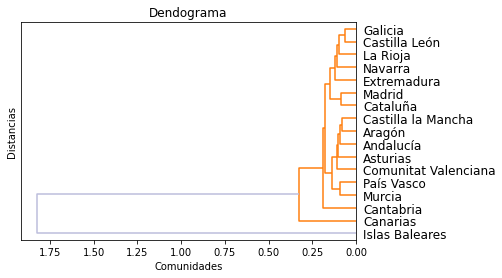

In [ ]:
model_P1 = linkage(matdist_P1, method='average', metric='euclidean', optimal_ordering=False)
dendograma = dendrogram(model_P1,labels = CCAA,leaf_rotation = 0, above_threshold_color='#bcbddc', orientation='left')
plt.title('Dendograma')
plt.xlabel('Comunidades')
plt.ylabel('Distancias')

<ipython-input-23-0534b2c43c9b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  model_P2 = linkage(matdist_P2, method='average', metric='euclidean', optimal_ordering=False)


Text(0, 0.5, 'Distancias')

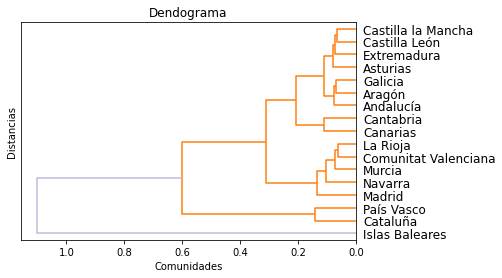

In [ ]:
model_P2 = linkage(matdist_P2, method='average', metric='euclidean', optimal_ordering=False)
dendograma = dendrogram(model_P2,labels = CCAA,leaf_rotation = 0, above_threshold_color='#bcbddc', orientation='left')
plt.title('Dendograma')
plt.xlabel('Comunidades')
plt.ylabel('Distancias')

<ipython-input-24-86dec5c5428c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  model_P3 = linkage(matdist_P3, method='average', metric='euclidean', optimal_ordering=False)


Text(0, 0.5, 'Distancias')

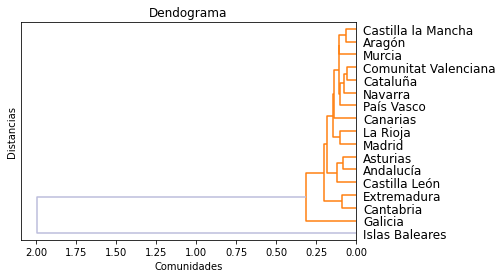

In [ ]:
model_P3 = linkage(matdist_P3, method='average', metric='euclidean', optimal_ordering=False)
dendograma = dendrogram(model_P3,labels = CCAA,leaf_rotation = 0, above_threshold_color='#bcbddc', orientation='left')
plt.title('Dendograma')
plt.xlabel('Comunidades')
plt.ylabel('Distancias')

<ipython-input-25-cf8bb4f10378>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  model_P4 = linkage(matdist_P4, method='average', metric='euclidean', optimal_ordering=False)


Text(0, 0.5, 'Distancias')

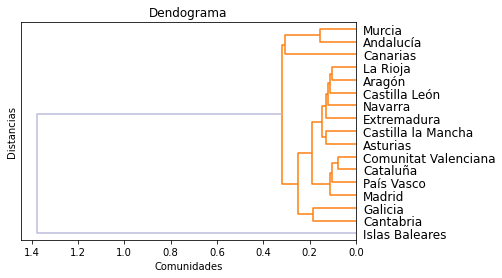

In [ ]:
model_P4 = linkage(matdist_P4, method='average', metric='euclidean', optimal_ordering=False)
dendograma = dendrogram(model_P4,labels = CCAA,leaf_rotation = 0, above_threshold_color='#bcbddc', orientation='left')
plt.title('Dendograma')
plt.xlabel('Comunidades')
plt.ylabel('Distancias')

Como en cada periodo podriamos tomar un número distinto de conglomerados, vamos a unificar la decisión y escogeremos 5 conglomerados en cada periodo.

In [ ]:
n = 5
clust_model1 = AgglomerativeClustering(n_clusters = n, affinity = 'precomputed', linkage = 'average')
clust_model1.fit(matdist_P1)
clust_model1.labels_ # conglomerado en el que se encuentra cada comunidad autónoma

array([1, 1, 1, 3, 2, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Vamos a contruir un DataFrame en el que quede más clara toda la información.

In [ ]:
conglomerados1 = pd.DataFrame({'Conglomerado1': clust_model1.labels_,'CCAA': CCAA})

Esto mismo lo repetimos para cada periodo.

In [ ]:
# Periodo 2
clust_model2 = AgglomerativeClustering(n_clusters = n, affinity = 'precomputed', linkage = 'average')
clust_model2.fit(matdist_P2)

conglomerados2 = pd.DataFrame({'Conglomerado2': clust_model2.labels_,'CCAA': CCAA})

# Periodo 3
clust_model3 = AgglomerativeClustering(n_clusters = n, affinity = 'precomputed', linkage = 'average')
clust_model3.fit(matdist_P3)

conglomerados3 = pd.DataFrame({'Conglomerado3': clust_model3.labels_,'CCAA': CCAA})

# Periodo 4
clust_model4 = AgglomerativeClustering(n_clusters = n, affinity = 'precomputed', linkage = 'average')
clust_model4.fit(matdist_P4)

conglomerados4 = pd.DataFrame({'Conglomerado4': clust_model4.labels_,'CCAA': CCAA})

# Unificamos los resultados en un DataFrame que represente la evolución
conglomerados12 = conglomerados1.merge(conglomerados2,on = "CCAA")
conglomerados123 = conglomerados12.merge(conglomerados3,on = "CCAA")
conglomerados_evolucion = conglomerados123.merge(conglomerados4,on = "CCAA")

# Pasamos el conjunto de datos a DataFrame
conglomerados_evolucion = pd.DataFrame({'Periodo1':[c for c in conglomerados_evolucion['Conglomerado1']],
                                       'Periodo2':[c for c in conglomerados_evolucion['Conglomerado2']],
                                       'Periodo3':[c for c in conglomerados_evolucion['Conglomerado3']],
                                       'Periodo4':[c for c in conglomerados_evolucion['Conglomerado4']]},
                                       index = conglomerados_evolucion['CCAA'])
conglomerados_evolucion.index.rename("Comunidades Autónomas", inplace = True)
conglomerados_evolucion['CCAA'] = [i for i in range(1,len(CCAA)+1)]
conglomerados_evolucion

Periodo1  Periodo2  Periodo3  Periodo4  CCAA
Comunidades Autónomas                                              
Andalucía                     1         4         4         4     1
Aragón                        1         4         1         1     2
Asturias                      1         4         4         1     3
Islas Baleares                3         3         3         3     4
Canarias                      2         2         0         2     5
Cantabria                     4         2         0         0     6
Castilla León                 0         4         4         1     7
Castilla la Mancha            1         4         1         1     8
Cataluña                      0         0         1         1     9
Comunitat Valenciana          1         1         1         1    10
Extremadura                   0         4         0         1    11
Galicia                       0         4         2         0    12
Madrid                        0         1         1         1    13
Murcia                        0         1         1         4    14
Navarra                       0         1         1         1    15
País Vasco                    0         0         1         1    16
La Rioja                      0         1         1         1    17

Una vez que tenemos el DataFrame de la evolución de conglomerados, pasamos a la sección **Conclusiones en el mapa** para ver en el mapa de España esta evolución.

## Conclusiones en el mapa

Vamos a representar en el mapa de España las variaciones que se han producido a lo largo del tiempo en materia de Actividad del Sector Público.

Para ello, hacemos uso del siguiente ejemplo: 

https://github.com/JuanCervigon/Datos_INE/blob/main/Casos_de_uso_Python/Mapa_provincias_poblaci%C3%B3n.ipynb

In [ ]:
# Cargamos la librerias que vamos a utilizar
import pandas as pd
!pip install geopandas
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
# Importamos dos librerias para la realización del GIF
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
# Importamos datos geográficos (autonómicos) que actualmente se encuentran en nuestro repositorio de GitHub
canarias2 = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/canarias.zip?raw=true')
peninsula_baleares = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/peninsula.zip?raw=true')

canarias = canarias2
from shapely import affinity
canarias["geometry"] = canarias["geometry"].apply(affinity.translate, xoff=4.5, yoff=7)

El sistemas de referencia de coordenadas, al que se puede acceder con el método **.crs**, de *canarias* y el de *peninsula_baleares* son diferentes, por lo que hay que pasarlos al mismo para poder crear un único conjunto de datos con ambos. Vamos a pasar el cambiar el sistema de *canarias* por el de *peninsula*.

Unimos los datos cartográficos una vez unificado el sistema de referencia usado.

In [ ]:
mapa = gpd.GeoDataFrame(pd.concat([peninsula_baleares, canarias.to_crs(crs="ETRS89")]))
mapa["codigo"] = mapa["NATCODE"].str[2:4] # el codigo de la comunidad autonoma es una subcadena de NATCODE (posiciones 2 y 3)
mapa[["NAMEUNIT", "NATCODE", "codigo"]]

NAMEUNIT      NATCODE codigo
0   Territorio no asociado a ninguna autonomía  34200000000     20
1                   Ciudad Autónoma de Melilla  34190000000     19
2                     Ciudad Autónoma de Ceuta  34180000000     18
3                                     La Rioja  34170000000     17
4                           País Vasco/Euskadi  34160000000     16
5                   Comunidad Foral de Navarra  34150000000     15
6                             Región de Murcia  34140000000     14
7                          Comunidad de Madrid  34130000000     13
8                                      Galicia  34120000000     12
9                                  Extremadura  34110000000     11
10                        Comunitat Valenciana  34100000000     10
11                          Cataluña/Catalunya  34090000000     09
12                          Castilla-La Mancha  34080000000     08
13                             Castilla y León  34070000000     07
14                                   Cantabria  34060000000     06
15                               Illes Balears  34040000000     04
16                      Principado de Asturias  34030000000     03
17                                      Aragón  34020000000     02
18                                   Andalucía  34010000000     01
0                                     Canarias  34050000000     05

Vamos a definir el código numérico porque nos interesará unir este conjunto de datos y el DataFrame de la evolución de conglomerados que creamos en la sección previa. 

Esto lo hacemos pasando a formato *integer* el código en formato cadena y le restamos 1.

Añadimos esta nueva variable al conjunto de datos del mapa.

In [ ]:
codigosNUM = [int(c) for c in mapa["codigo"]] # formato integer
mapa["CCAA"] = codigosNUM

Filtramos las columnas que nos interesan y añadimos los conglomerados de cada periodo, que está guardado en el DataFrame *df_evolucion*.

In [ ]:
mapa_evolucion = mapa[["NAMEUNIT","CCAA", "codigo","geometry"]] 
mapa_evolucion = conglomerados_evolucion.merge(mapa_evolucion,how = "left",on = "CCAA") # de este modo, prescindimos de los codigos que no nos interesan

Pasamos el DataFrame a GeoDataFrame, tipo del módulo gpd.

In [ ]:
mapa_evolucion = gpd.GeoDataFrame(mapa_evolucion)

A continuación, representamos los mapas de cada periodo con los conglomerados.

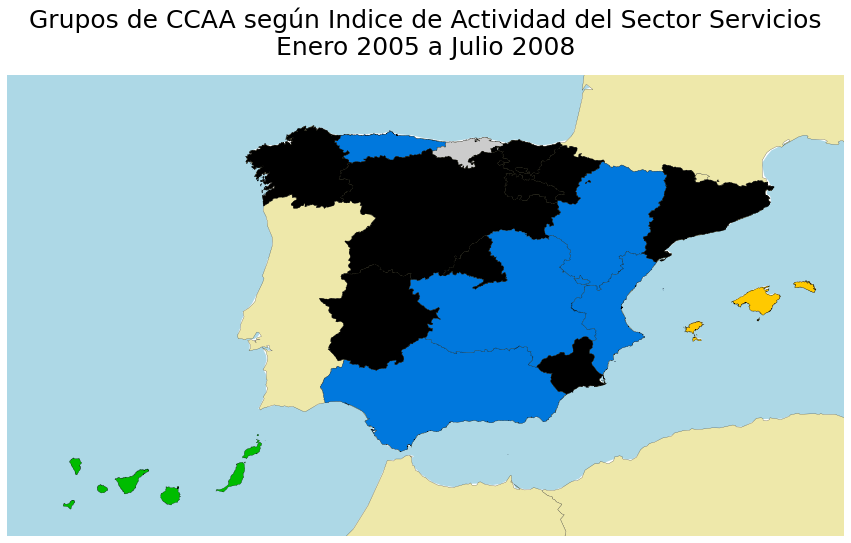

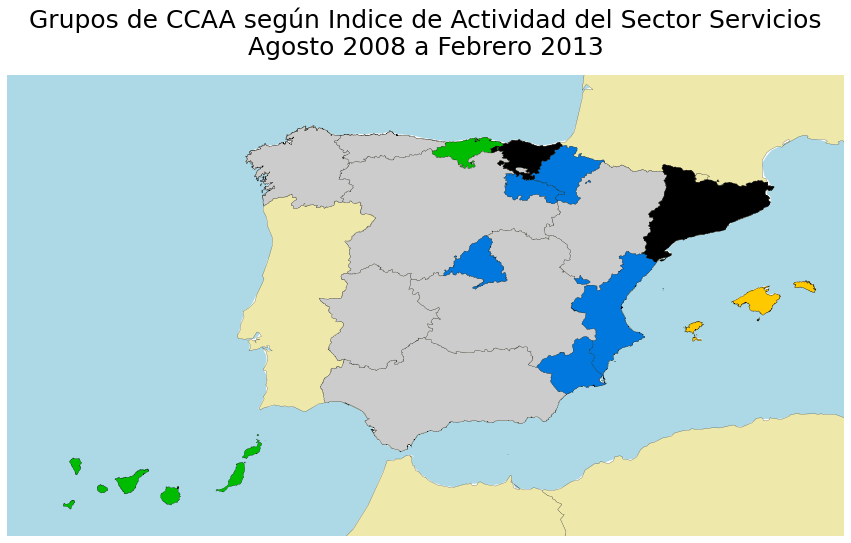

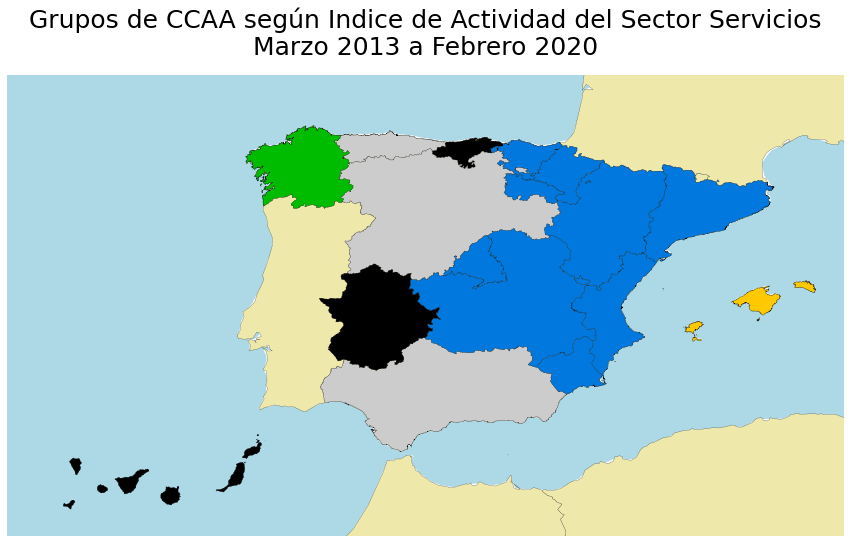

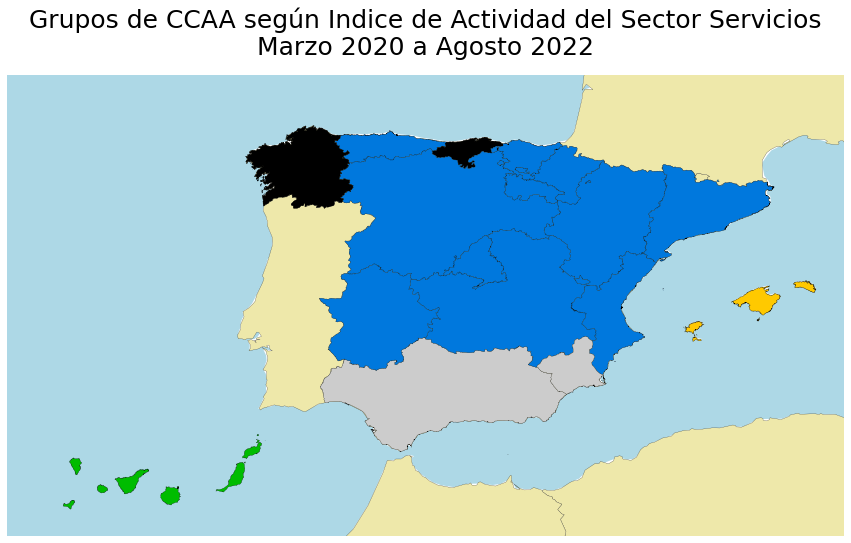

In [ ]:
count = 0

for fechas in mapa_evolucion.columns.to_list()[0:4]:

    if fechas == 'Periodo1': 
      fecha = "Enero 2005 a Julio 2008"
      fichero = "Mapa_P1.png"
    if fechas == 'Periodo2': 
      fecha = "Agosto 2008 a Febrero 2013"
      fichero = "Mapa_P2.png"
    if fechas == 'Periodo3': 
      fecha = "Marzo 2013 a Febrero 2020"
      fichero = "Mapa_P3.png"
    if fechas == 'Periodo4': 
      fecha = "Marzo 2020 a Agosto 2022"
      fichero = "Mapa_P4.png"

    
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.axis([-15, 5, 34, 45]) 
 
    # Título y ejes:
    ax.set_title("Grupos de CCAA según Indice de Actividad del Sector Servicios\n" + fecha, 
                  pad = 20, 
                  fontdict={"fontsize":25}) 

    # Eliminar ejes
    ax.set_axis_off()

    # Dibujamos nuestro mapa de comunidades autónomas:
    mapa_evolucion.plot(
        ax=ax,
        column=fechas,
        cmap="nipy_spectral",
        edgecolor="black",
        linewidth=0.2,
        zorder=5
        ); 

    count += 1;

    oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
    mapa_oceanos = gpd.read_file(oceanos_file)
    mapa_oceanos.plot(ax=ax,
                    color="lightblue",
                    zorder=0);
 
    paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
    mapa_paises = gpd.read_file(paises_file)
    mapa_paises.plot(ax=ax,
                   color="palegoldenrod",
                   edgecolor="black",
                   linewidth=0.2,
                   zorder=2); 
  
     
    imagen = ax.get_figure()
    ax.plot()
    plt.savefig(fichero, bbox_inches='tight') 





Vamos a guardar las imágenes en formato PIL para después poder leerlas junto con las representaciones de las series por conglomerados.

In [ ]:
from PIL import Image
i1 = Image.open("/content/Mapa_P1.png")
i1.save("/content/Im_Mapa_P1.png")
i2 = Image.open("/content/Mapa_P2.png")
i2.save("/content/Im_Mapa_P2.png")
i3 = Image.open("/content/Mapa_P3.png")
i3.save("/content/Im_Mapa_P3.png")
i4 = Image.open("/content/Mapa_P4.png")
i4.save("/content/Im_Mapa_P4.png")


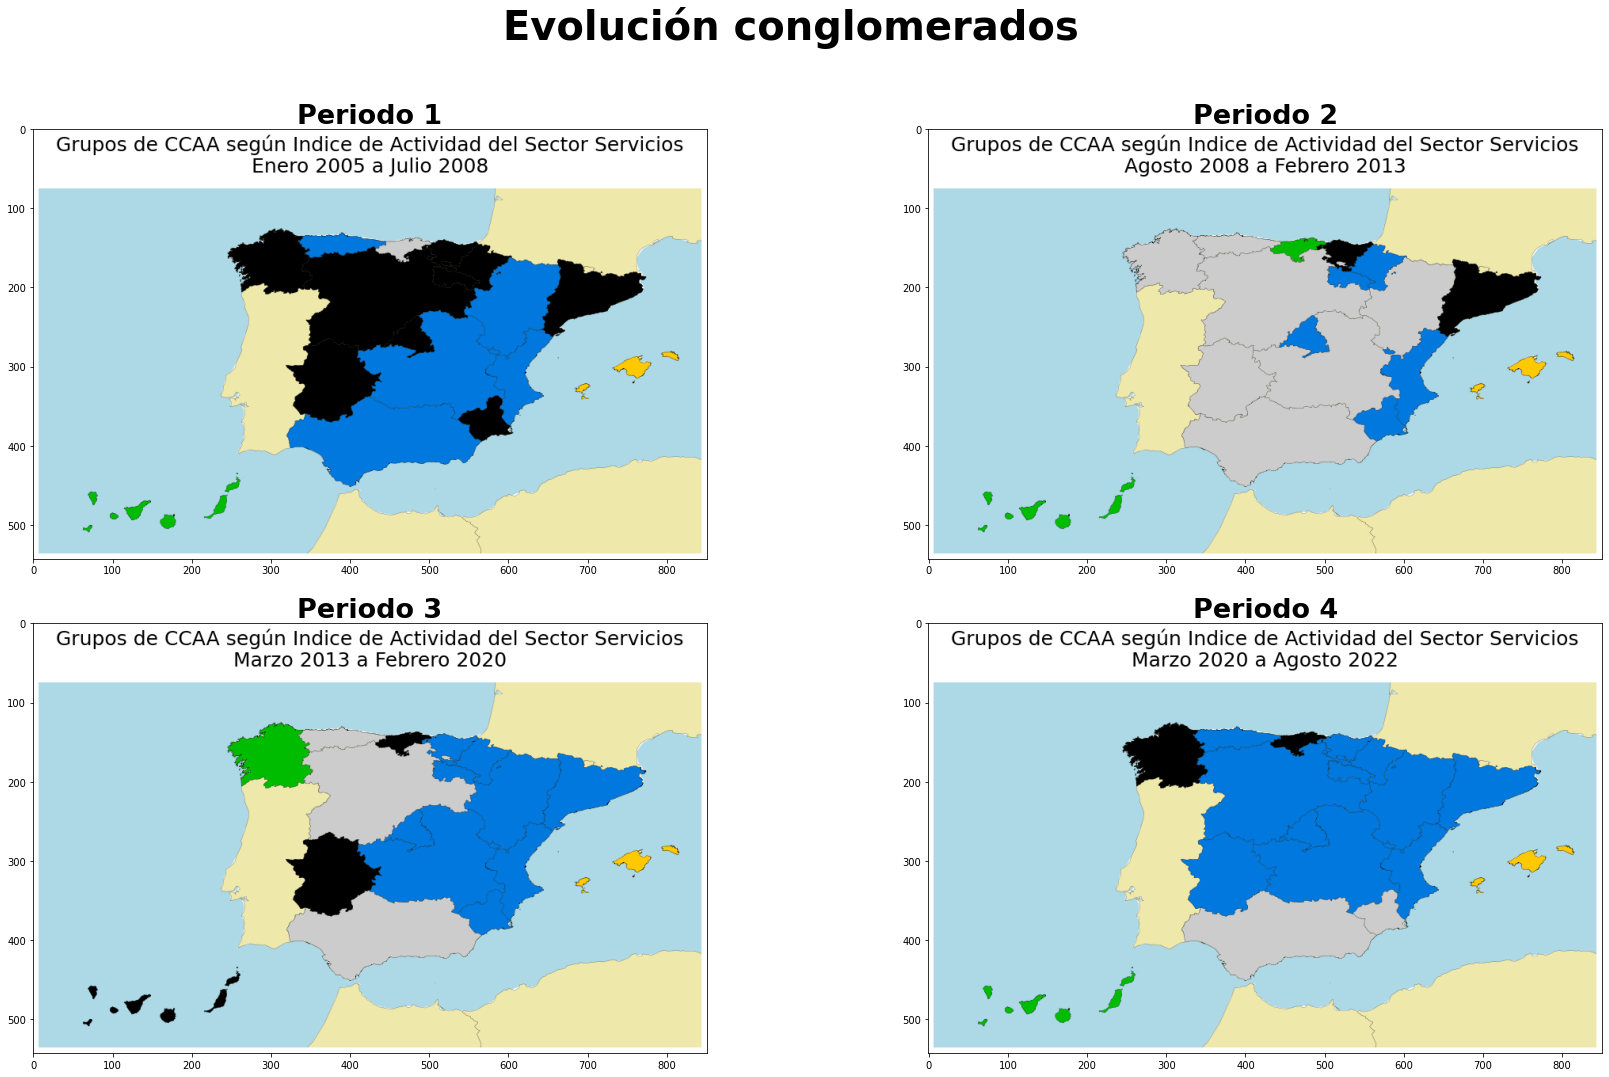

In [ ]:
fig = plt.figure(figsize=(30,17))
fig.subplots_adjust(hspace=0.15, wspace=0.15)
fig.suptitle("Evolución conglomerados",size='xx-large',weight='extra bold',stretch='extra-expanded',fontsize=40)
  
k = 1
for im in [i1,i2,i3,i4]:
    title = 'Periodo '+str(k)
    ax = fig.add_subplot(2,2,k)
    ax.set_title(title,size='large',weight='extra bold',stretch='extra-expanded',fontsize=27)
    ax.imshow(im)
    k += 1

imagen = ax.get_figure()
ax.plot()
plt.savefig("Evolucion", bbox_inches='tight')

## Conclusiones

Algo interesante es ver las series temporales por conglomerado y periodo.

Creamos una array que contenga los nombres de las comunidades autónomas para que sea más sencillo acceder a ellas.

In [ ]:
CCAAdf = np.array(CCAA)
conglomerados1['Codigo'] = range(0,len(CCAA))

In [ ]:
from IPython.display import Image

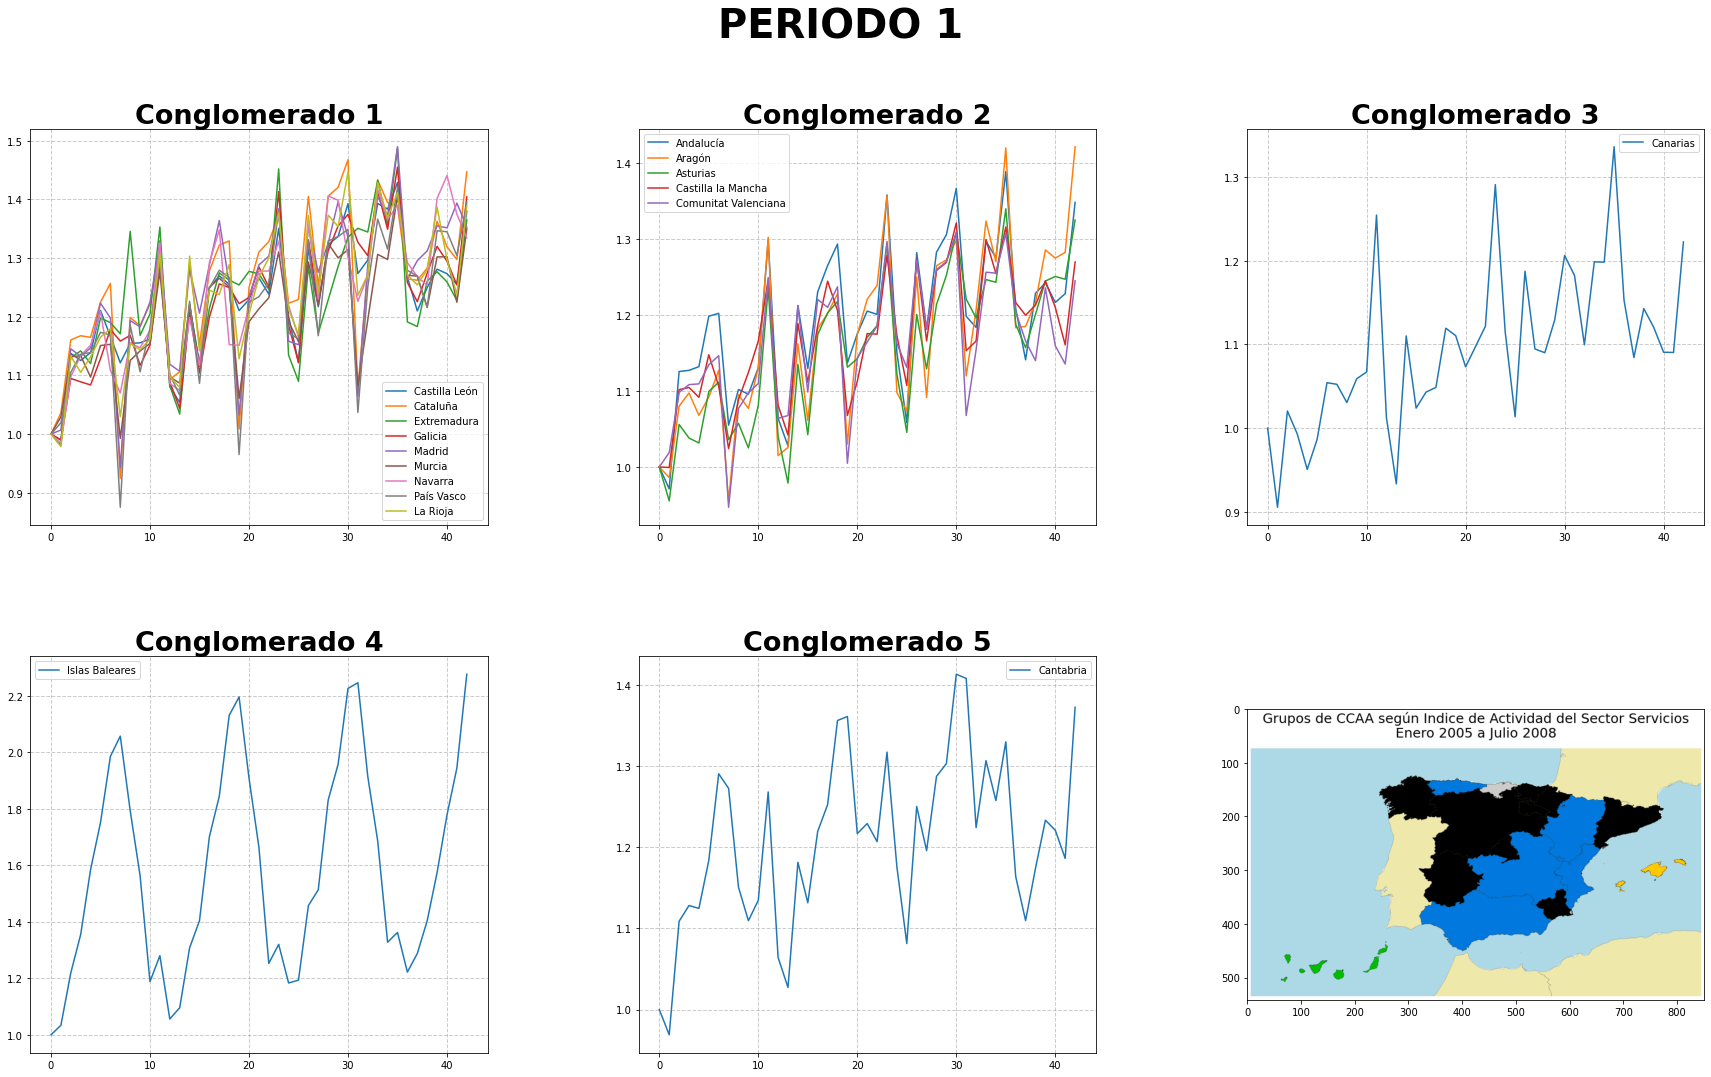

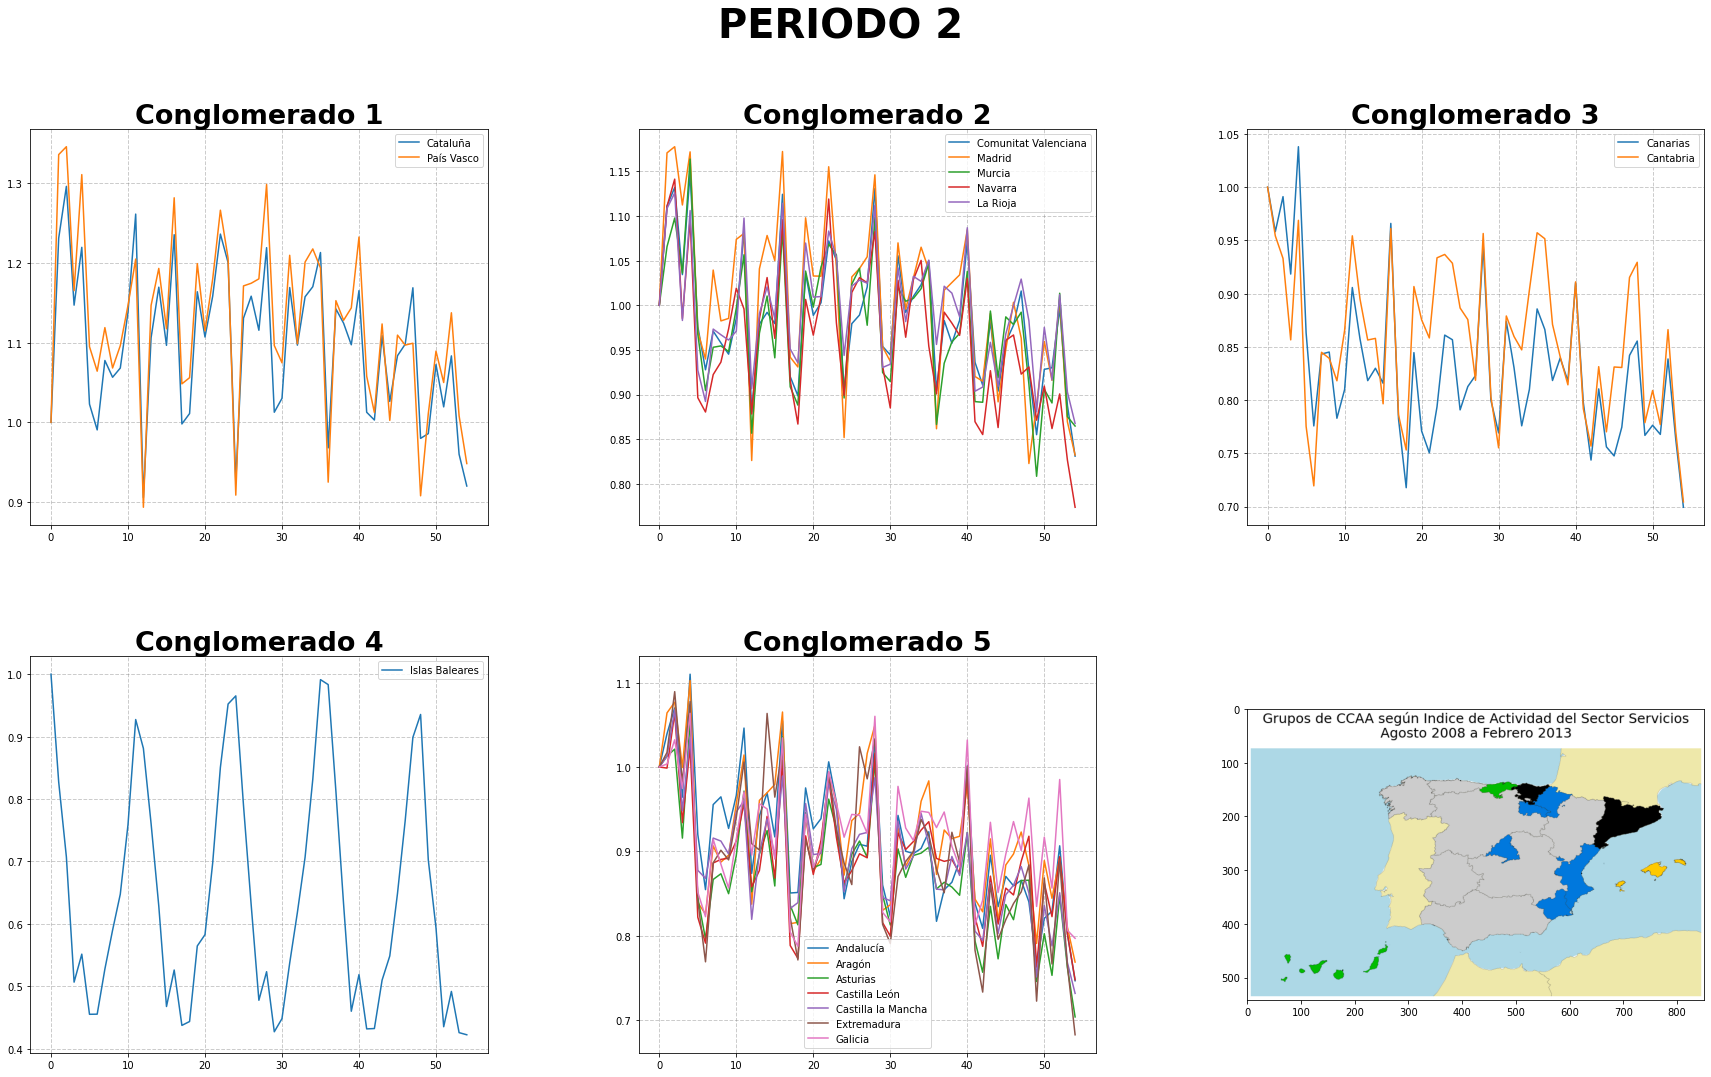

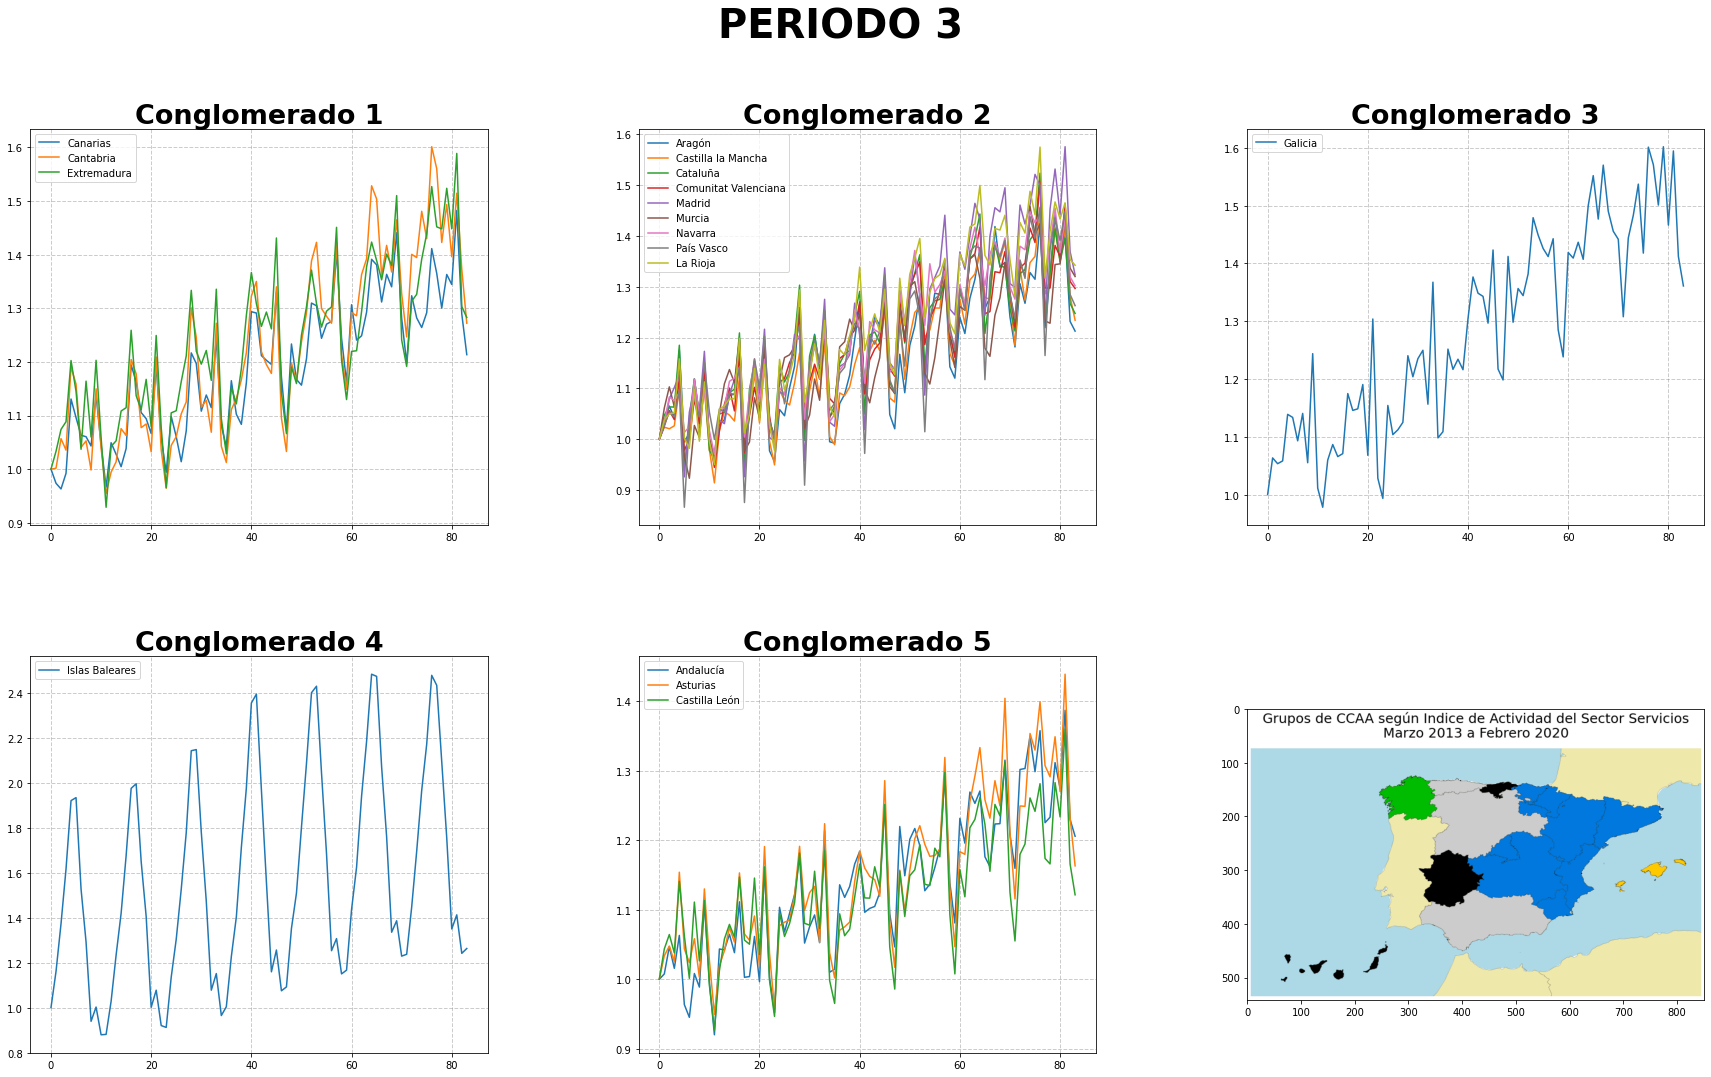

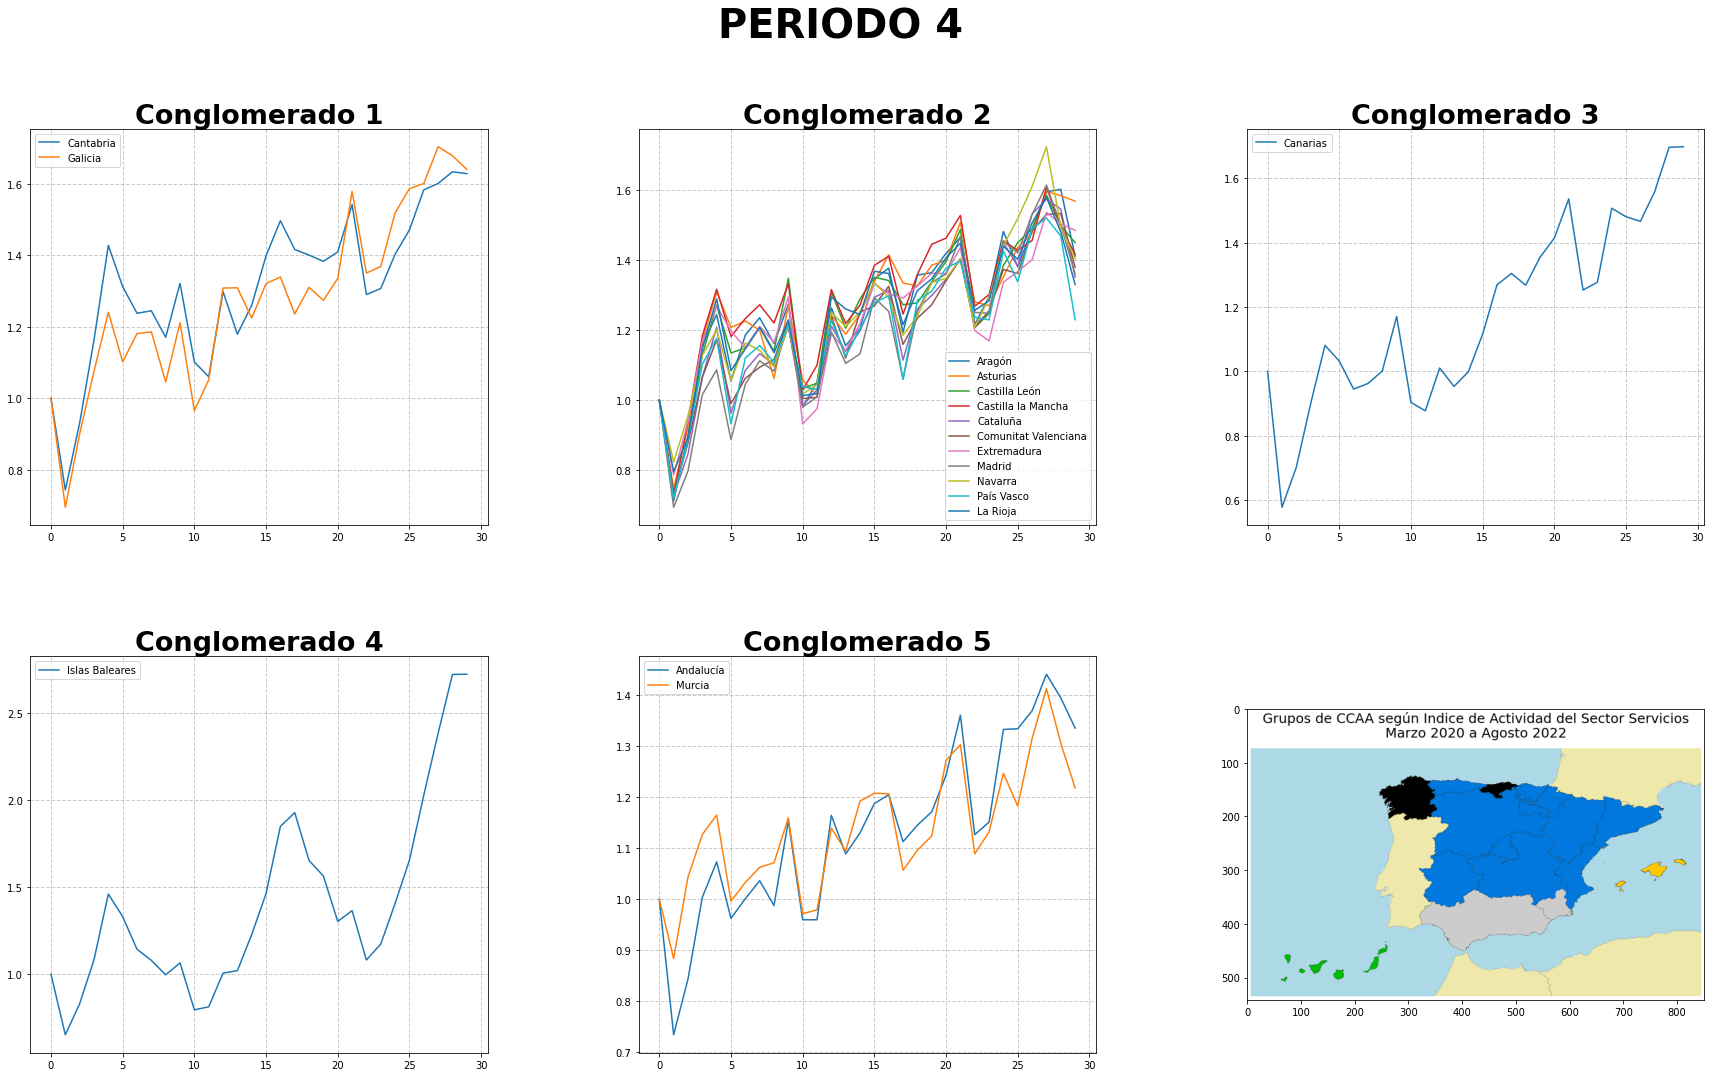

In [ ]:
p = 1

for datos,cluster,name,im in [[datos_P1,conglomerados1,'Conglomerado1',i1],[datos_P2,conglomerados2,'Conglomerado2',i2],[datos_P3,conglomerados3,'Conglomerado3',i3],[datos_P4,conglomerados4,'Conglomerado4',i4]]:

  k = 1
  fichero = 'ConglomeradosP'+str(p)

  subtitulo = 'PERIODO ' + str(p)
  fig = plt.figure(figsize=(30,17))
  fig.subplots_adjust(hspace=0.33, wspace=0.33)
  fig.suptitle(subtitulo,size='xx-large',weight='extra bold',stretch='extra-expanded',fontsize=40)
  
  for c in range(n):
    title = 'Conglomerado '+str(c+1)
    idx = [i for i in range(cluster.shape[0]) if cluster[name][i] == c]
    ccaa0 = cluster[name][idx]
    ax = fig.add_subplot(2,3,k)
    x = range(0,datos.shape[0])
    ax.plot(x,datos[datos.columns[idx]])
    ax.legend(CCAAdf[idx])
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.set_title(title,size='large',weight='extra bold',stretch='extra-expanded',fontsize=27)

    k += 1

  p += 1
  ax = fig.add_subplot(2,3,6)
  ax.imshow(im)

  imagen = ax.get_figure()
  ax.plot()
  plt.savefig(fichero, bbox_inches='tight')

  plt.show() 
  